# 📜Brief
## Introduction
The client is a large grocery store in Ecuador that wants to be more efficient in stocking inventory.

## Problem
If inventory is oversupplied, unsold items will go to waste and are cost to the grocery. If inventory is undersupplied, there wouldn't be enough items to sell that meets demand and they would miss the opportunity to earn more money.

## Hypothesis
If we are able to know how much inventory to supply in a given day, then we would minimize the cost of oversupplying items that does not sell and goes to waste. And maximizing revenue by having enough supply of items that we know will be in demand.

## Goal
To predict and forecast the inventory needed to meet the demand of market.

-----
[Overview](https://www.kaggle.com/competitions/store-sales-time-series-forecasting)

[Kaggle](https://www.kaggle.com/code/fiftythirtyfour/store-sales/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 400
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
## Clean
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.year
df['weekname'] = df.date.dt.day_name()

In [5]:
## Organize
target = 'sales'
cat = [x for x in df.columns if df.dtypes[x] == 'object']
num = [x for x in df.columns if df.dtypes[x] in ('int64', 'float64')]
num.remove('id')
num.remove('sales')

In [6]:
## train test split
train = df.loc[df['date'].dt.year != 2017]
test = df.loc[df['date'].dt.year == 2017]

# 🤓Data Science
## Explore

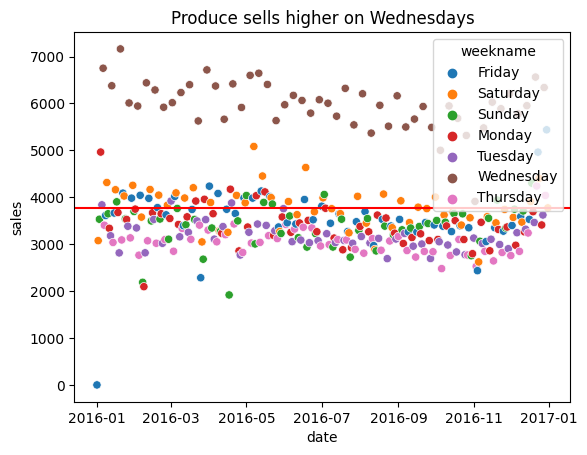

In [7]:
g = train.query('year == 2016')
g = g.query('store_nbr == 24')
# g = g.query('date == "2016-12-01"')
# sns.scatterplot(g, x='date', y=target, hue='store_nbr', palette='Set1');
g = g.query('family == "PRODUCE"')
sns.scatterplot(g, x='date', y=target, hue='weekname')
plt.axhline(g[target].mean(), color='red');
plt.title('Produce sells higher on Wednesdays');

💎There seems to more Produce being sold on Wednesdays.

In [8]:
train.groupby('family')[target].describe().sort_values(by='std')

,count,mean,std,min,25%,50%,75%,max
family,,,,,,,,
BOOKS,78678.0,0.052353,0.529964,0.0,0.00000,0.000000,0.00000,51.000
BABY CARE,78678.0,0.092961,0.676513,0.0,0.00000,0.000000,0.00000,116.000
HOME APPLIANCES,78678.0,0.439869,0.956899,0.0,0.00000,0.000000,1.00000,15.000
HARDWARE,78678.0,1.094563,1.607044,0.0,0.00000,1.000000,2.00000,49.000
BEAUTY,78678.0,3.446732,4.497405,0.0,0.00000,2.000000,5.00000,136.000
MAGAZINES,78678.0,2.381237,5.495999,0.0,0.00000,0.000000,2.00000,79.000
AUTOMOTIVE,78678.0,5.894888,6.202051,0.0,2.00000,4.000000,8.00000,255.000
PET SUPPLIES,78678.0,3.174534,6.808228,0.0,0.00000,0.000000,3.00000,103.000
LAWN AND GARDEN,78678.0,4.371285,7.320915,0.0,0.00000,1.000000,7.00000,201.000


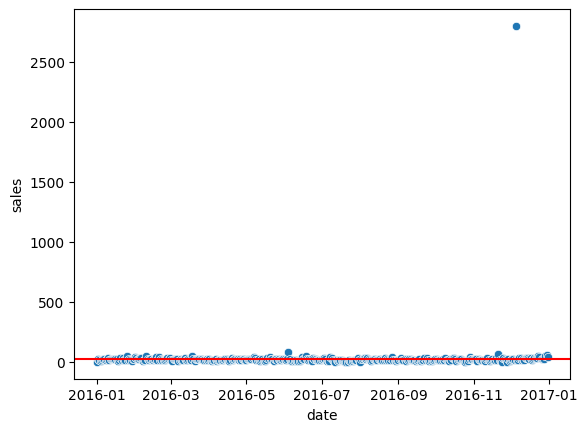

In [9]:
g = train.query('year == 2016')
g = g.query('store_nbr == 24')
# g = g.query('date == "2016-12-01"')
# sns.scatterplot(g, x='date', y=target, hue='store_nbr', palette='Set1');
g = g.query('family == "GROCERY II"')
sns.scatterplot(g, x='date', y=target)
plt.axhline(g[target].mean(), color='red');


# 🤖Model

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, att):
        self.att = att
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.att]
    
num_pp = Pipeline([
    ('dataselect', DataSelect(['store_nbr', 'week']))
    , ('impute', SimpleImputer(strategy='mean'))
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(['family']))
    , ('encoder', OneHotEncoder(sparse_output=False))
])

pipe = FeatureUnion([
    ('numeric', num_pp)
    , ('cat', cat_pp)
])

pipe.fit(train)
train_pp = pipe.transform(train)
test_pp = pipe.transform(test)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [12]:
reg_lin = LinearRegression()
reg_lin.fit(train_pp, train[target])
np.sqrt(
    -cross_val_score(
        reg_lin, train_pp, train[target], scoring='neg_mean_squared_error').mean()
)

775.0032354169949

In [13]:
reg_svr = LinearSVR()
reg_svr.fit(train_pp, train[target])
np.sqrt(
    -cross_val_score(
        reg_svr, train_pp, train[target], scoring='neg_mean_squared_error').mean()
)

809.78569954274

# 📌Notes
💎There is something around Sep-Oct for the year 2016. No one is buying stuff for store number 25.
💎There seems to more Produce being sold on Wednesdays.